# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий.

Необходимо подготовить модель машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.



Цель исследования – на основании имеющихся данных о содержании веществ в сырье на разных этапах обогащения золота построить модель, которая будет предсказывать
коэффициент восстановления золота из золотосодержащей руды.
Исследование будет проходить в несколько этапов:
- изучение и предварительная обработка данных;
- исследовательский анализ данных, в ходе которого будет изучена динамика содержания различных веществ в сырье на каждом этапе производственного процесса;
-  построение различных моделей  и выбор модели с лучшими показателями;
- проверка выбранной модели на тестовой выборке, а также на адекватность


## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


Загружаем данные.Поскольку данные индексируются датой, используем столбец 'date' в качестве индексов

In [3]:
# Загружаем обчающую выборку
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col=['date'])


In [4]:
# Загружаем тестовую выборку
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col=['date'])

In [5]:
# Загружаем исходные данные
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col=['date'])

Выведем первые строки, чтобы убедиться, что индексы применились корректно

In [6]:
df_train.head(3)  

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [7]:
df_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [8]:
df_full.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Изучим информацию о датасетах

In [9]:
df = [df_train, df_test, df_full]
for i in df:
    print(i.info())
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

Посмотрим, какие признаки содержатся в датафрейме

In [10]:
df_train.columns.tolist()

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floa

Целевыми признаками, предсказания которых необходимо сделать в ходе исследования, являются:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Исходный датафрейм разделен на обучающий и тестовый в пропорции 73% на 27%. Типы данных в столбцах соответствуют их фактическому содержимому. Вместе с тем, в тестовом датафрейме отсутствует часть столбцов, и во всех датафреймах имеются пропуски. 

In [11]:
# Посмотрим, какие столбцы отсутствуют в тестовой выборке
# Для этого создадим два списка с названиями столбцов в обучающей и тестовой выборке
# И найдем непересекающиеся значения
columns_train = df_train.columns.tolist()
columns_test = df_test.columns.tolist()
list(set(columns_train)^set(columns_test))

['rougher.output.tail_au',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'final.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_sol',
 'rougher.output.tail_pb',
 'final.output.tail_au',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.recovery',
 'rougher.output.tail_sol',
 'final.output.recovery',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.concentrate_pb',
 'primary_cleaner.output.tail_ag',
 'primar

In [12]:
len(list(set(columns_train)^set(columns_test)))

34

В тестовой выборке отсутствуют признаки из разряда output, то есть признаки, характеризующие состояние концентрата и хвостов уже после каждого этапа очистки, а также признаки calculation, рассчитанные на их основе. Поскольку именно эффективность обогащения необходимо предсказать (а она напрямую зависит от состояния концентратов и хвостов после очистки), то брать данные признаки для обучения модели нельзя. Чтобы модель не знала заранее предсказываемые ответы, данные признаки необходимо будет удалить из тренировочного датафрейма. Также в тестовой выборке отсутствуют целевые признаки.

In [13]:
print('Наличие явных дубликатов')
for i in df:
    print(i.duplicated().sum())  

Наличие явных дубликатов
0
0
0


В датафреймах имеются пропуски. Возможно они связаны со сбоями в работе датчиков, измеряющх показания.   По имеющимся данным, значения соседних по времения параметров часто похожи. Поскольку датафреймы прондексированы по времени, используем для заполнения пропусков значения соседней ячейки.

In [14]:
df_test = df_test.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

Рассчитаем эффективность обогащения (recovery) для обучающей выборки и проверим, насколько рассчеты отличаются от значений, имеющихся в датафрейме.
Для этого сперва рассчитаем значение recovery по формуле, а  затем рассчитаем среднюю абсолютную ошибку MAE.

In [15]:
# выделим признаки, необходимые для рассчета эффективности обогащения
C = df_train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = df_train['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
T = df_train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки

# рассчитываем эффективность обогащения по формуле
recovery = ((C*(F-T))/(F*(C-T)))*100

# рассчитываем МАЕ
MAE = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
print('Значение MAE равно', MAE)

Значение MAE равно 9.73512347450521e-15


Невысокое значние МАЕ говорит о том, что рассчет произведен корректно

Поскольку в тестовой выборке отсутствуют целевые принаки, добавим их из исходного датафрейма. Объединение датафреймов осуществляем по индексам.

In [16]:
df_test = df_test.merge(df_full.loc[:, ['rougher.output.recovery','final.output.recovery']],
                        left_index = True,  right_index=True)

In [17]:
df_test.columns.tolist()

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [18]:
# Сформируем список столбцов, которые необходимо будет убрать из обучающей выборки перед обучением модели
columns_train = df_train.columns.tolist()
columns_test = df_test.columns.tolist()
columns_to_delete = list(set(columns_train)^set(columns_test))

Выводы: 
- для удобства дальнейшего исследования при загрузке данных графа с датой была использована в качестве индексов;
- в данных имелись пропуски, предположительно связанные с огрехами в работе измерительных приборов. Поскольку по условию задачи соседние по времени параметры похожи, пропуски были заполнены предыдущими известными значениями;
- в тестовом датафрейме отсутствуют признаки, характеризующие состояние концентратов после каждого этапа очистки. Во избежание утечки данные признаки будет необходимо удалить из обучающего датафрейма перед обучением модели;
- в тестовом датафрейме отсутствуют целевые признаки. Для возможности проверки модели на тестовой выборке, эти признаки были восстановлены из исходного датафрейма;
- была оценена корректность рассчета эффективности обогащения. Для этого эффективность обогащения была рассчитана вручную по формуле, затем найдена МАЕ между этим ручным рассчетом и имеющимися значениями. Полученное низкое значение МАЕ означает, что эффективность обогащения была рассчитана правильно. 

## Анализ данных

Посмотрим, как изменяются концентрации золота, серебра и свинца на разных этапах очистки. В данных это столбцы rougher.input.feed, rougher.output.concentrate, primary_cleaner.output.concentrate и final.output.concentrate соответственно. 

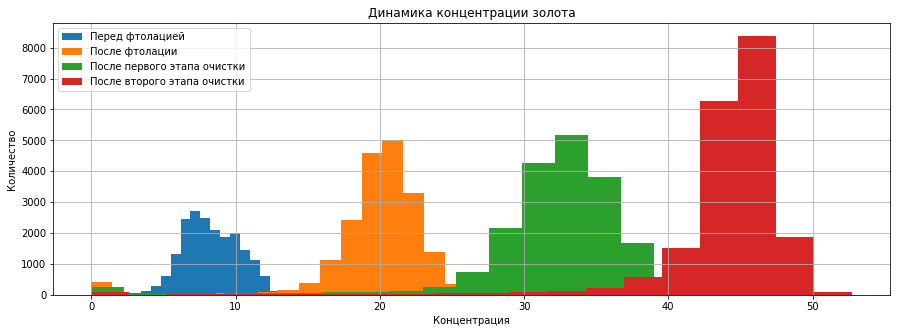

In [19]:
plt.figure(figsize=(15,5))
df_full['rougher.input.feed_au'].hist(bins=20, label='Перед фтолацией')
df_full['rougher.output.concentrate_au'].hist(bins=20, label='После фтолации')
df_full['primary_cleaner.output.concentrate_au'].hist(bins=20, label='После первого этапа очистки')
df_full['final.output.concentrate_au'].hist(bins=20, label='После второго этапа очистки')
plt.title('Динамика концентрации золота')
plt.legend(loc='upper left')
plt.ylabel('Количество')
plt.xlabel('Концентрация');

Из графика видно, как на каждом этапе очистки возрастает концентрация золота. При этом форма распределения на каждом этапе сохраняется. Также на гарфике видны подозрительные нулевые значения, возможно, это вбросы. 

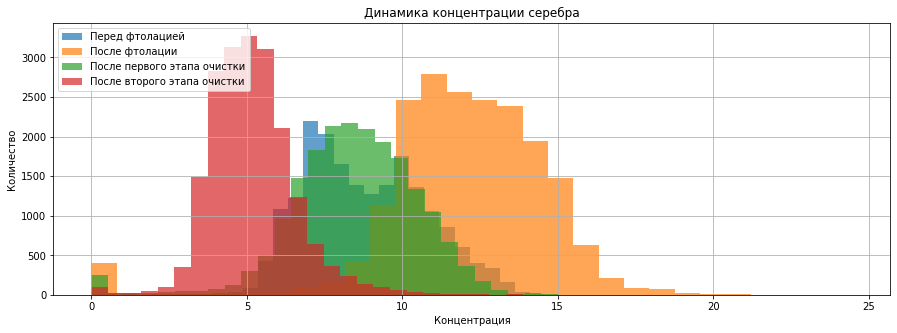

In [20]:
plt.figure(figsize=(15,5))
# Используем параметр alpha, чтобы сделать графики полупрозрачными 
df_full['rougher.input.feed_ag'].hist(bins=30, label='Перед фтолацией', alpha=.7)
df_full['rougher.output.concentrate_ag'].hist(bins=30, label='После фтолации', alpha=.7)
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=30, label='После первого этапа очистки', alpha=.7)
df_full['final.output.concentrate_ag'].hist(bins=30, label='После второго этапа очистки',alpha=.7)
plt.title('Динамика концентрации серебра')
plt.legend(loc='upper left')
plt.xlabel('Концентрация')
plt.ylabel('Количество');

Концентрация серебра изменяется не так линейно, как золота: она становится максимальной после флотации, а затем начинает снижаться, достигая минимума после второго этапа очистки. Снова видим столбик нулевых значений. 

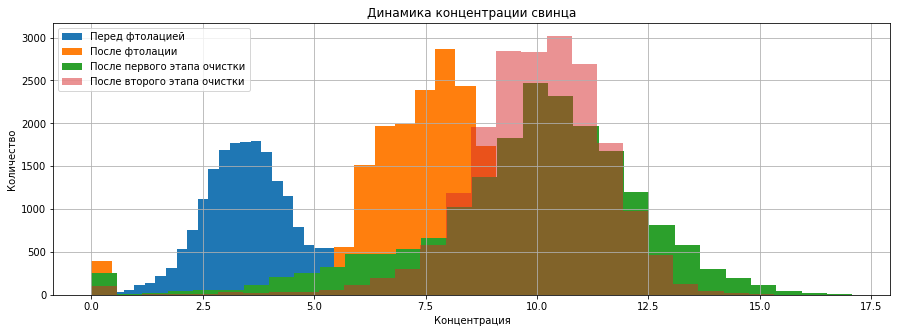

In [21]:
plt.figure(figsize=(15,5))
df_full['rougher.input.feed_pb'].hist(bins=30, label='Перед фтолацией')
df_full['rougher.output.concentrate_pb'].hist(bins=30, label='После фтолации')
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=30, label='После первого этапа очистки')
df_full['final.output.concentrate_pb'].hist(bins=30, label='После второго этапа очистки', alpha=.5)
plt.title('Динамика концентрации свинца')
plt.legend(loc='upper left')
plt.xlabel('Концентрация')
plt.ylabel('Количество');

Концентрация свинца вырастает после флотации и первого этапа очистки, после чего остается практически неизменной. 

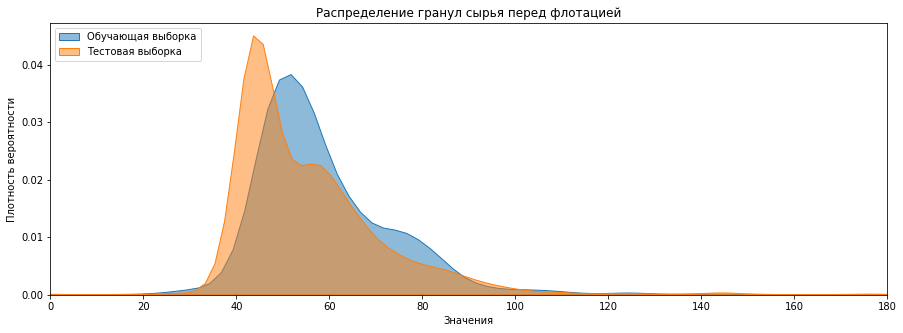

In [35]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df_train['rougher.input.feed_size'], label='Обучающая выборка', alpha= .5, shade=True)
sns.kdeplot(df_test['rougher.input.feed_size'], label='Тестовая выборка', alpha=.5, shade=True)
plt.title('Распределение гранул сырья перед флотацией')
plt.legend(loc='upper left')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.xlim(0, 180);

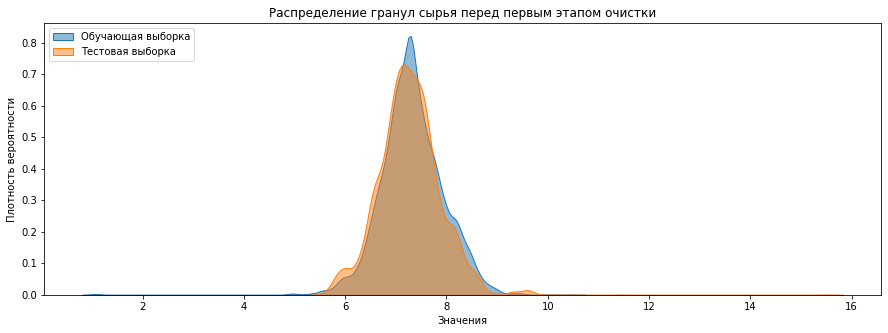

In [36]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df_train['primary_cleaner.input.feed_size'], label='Обучающая выборка', alpha= .5, shade=True)
sns.kdeplot(df_test['primary_cleaner.input.feed_size'], label='Тестовая выборка', alpha=.5, shade=True)
plt.title('Распределение гранул сырья перед первым этапом очистки')
plt.legend(loc='upper left')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности');


Форма распределения размеров гранул сырья на обучающей и тестовой выборках совпадает

In [37]:
# Суммарная концентрация металлов в сырье
sum_rougher_input = df_full[['rougher.input.feed_au', 
                             'rougher.input.feed_ag',
                             'rougher.input.feed_pb',
                             'rougher.input.feed_sol']].sum(axis=1)


In [140]:
# Суммарная концентрация металлов в черновом концентрате
sum_rougher_output = df_full[['rougher.output.concentrate_au',
                              'rougher.output.concentrate_ag',
                              'rougher.output.concentrate_pb',
                              'rougher.output.concentrate_sol']].sum(axis=1)

In [141]:
# Суммарная концентрация металлов в финальном концентрате
sum_final = df_full[['final.output.concentrate_au',
                     'final.output.concentrate_ag',
                     'final.output.concentrate_pb',
                     'final.output.concentrate_sol']].sum(axis=1)

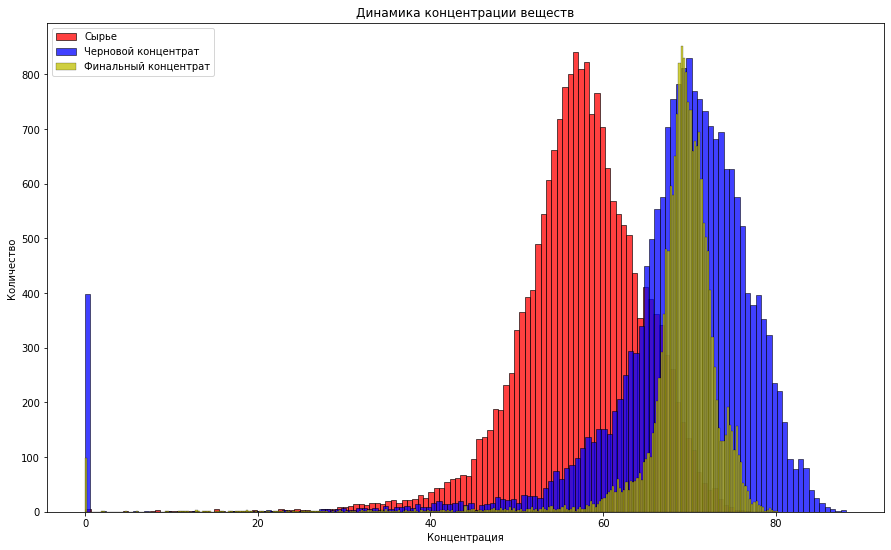

In [142]:
plt.figure(figsize=(15,9))
plt.title('Динамика концентрации веществ')
sns.histplot(sum_rougher_input, label='Сырье', color='r')
sns.histplot(sum_rougher_output, label='Черновой концентрат', color='b')
sns.histplot(sum_final, label='Финальный концентрат', color='y')
plt.legend(loc='upper left')
plt.ylabel('Количество')
plt.xlabel('Концентрация');


Из графика видно, как на каждом этапе концентрация всех веществ возрастает, а диапазоны, в которых распределены значения веществ, сужаются. При этом отчетливо видны нулевые значения, по всей видимости, это вбросы, связанные со сбоями в работе оборудования. Перед последующим обучением модели удалим вбросы из тренировочной выборки. 

In [143]:
# Исходное сырье может быть любым, поэтому столбцы rougher.input не трогаем

# Удаляем нулевые значения в черновом концентрате
df_train = df_train[(df_train['rougher.output.concentrate_au'] != 0)\
                    & (df_train['rougher.output.concentrate_ag'] != 0)\
                    & (df_train['rougher.output.concentrate_pb'] != 0) \
                    & (df_train['rougher.output.concentrate_sol'] != 0)]
                   

# Удаляем нулевые значения в финальном концентрате
df_train = df_train[(df_train['final.output.concentrate_au'] != 0)\
                    & (df_train['final.output.concentrate_ag'] != 0) 
                    & (df_train['final.output.concentrate_pb'] != 0) 
                    & (df_train['final.output.concentrate_sol'] != 0)]


Выводы: на этапе анализа данных была изучена динамика концентрации различных веществ на разных этапах технологического процесса.
Концентрация золота возрастает с каждым этапом. Концентрация других веществ изменяется не так линейно, однако суммарная концентрация всех веществ от этапа к этапу растет и становится максимальной после финального этапа очистки.
Также было изучено распределение размеров гранул вещества в тестовой и обучающей выборке. Поскольку распределение размеров гранул совпадает, данные выборки корректно использовать для дальнейшего обучения и проверки модели. Были выявлены аномальные значения - нулевые концентрации веществ после очистки. Нулевые значение для тестовой выборки были удалены

## Модель

### Перед обучением моделей выделим целевые и обучающие признаки 

In [144]:
# Удаляем из обучающей выборки ранее выявленные признаки
df_train = df_train.drop(columns=columns_to_delete, axis=1)

In [145]:
# выделяем целевые и обучающие признаки для обучающей выборки
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)                          

In [146]:
# выделяем целевые и обучающие признаки для тестовой выборки
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)         

### Напишем функцию для вычисления итоговой sMAPE

In [147]:
def sMAPE(target, predict):
    smape = np.mean(np.abs(target-predict)/((np.abs(target)+abs(predict))/2))*100
    return smape                      

In [148]:
def func_for_final_smape(smape_rougher, smape_final):
    final_smape = 0.25*smape_rougher + 0.75*smape_final
    return final_smape

In [149]:
smape_scorer = make_scorer(sMAPE, greater_is_better = False)

### Строим модель линейной регрессии

In [150]:
%%time
# Инициируем модель
model_lr = LinearRegression()

# Считаем sMAPE для сырья rougher
rougher_model_lr = cross_val_score(model_lr, features_train, 
                                   target_train_rougher, 
                                   scoring=smape_scorer, 
                                   cv=5)

smape_rougher_lr = (rougher_model_lr).mean()

# Считаем sMAPE для финального концентрата

final_model_lr =  cross_val_score(model_lr, features_train, 
                                  target_train_final, 
                                  scoring=smape_scorer, 
                                  cv=5)
smape_final_lr = (final_model_lr).mean()

# Считаем итоговый sMAPE
sMAPE_lr = func_for_final_smape(smape_rougher_lr, smape_final_lr)
print('Итоговое sMAPE для линейной регрессии:', sMAPE_lr*(-1))

Итоговое sMAPE для линейной регрессии: 10.0592614434828
CPU times: user 789 ms, sys: 1.91 s, total: 2.7 s
Wall time: 2.67 s


### Построим модель Дерево решений

In [151]:
%%time
# Инициируем модель Дерево решений
model_dt=DecisionTreeRegressor(random_state=12345)

parameters= {'max_depth':range(1,10)}                        
grid_dt=GridSearchCV(model_dt,param_grid=parameters,
                     cv=5, scoring=smape_scorer, 
                     n_jobs=-1)

# Обучаем модель для сырья rougher
grid_dt_rougher = grid_dt.fit(features_train, target_train_rougher)
smape_rougher_dt = abs(grid_dt_rougher.best_score_)
print('Лучшее значение глубины для Дерева решений (сырье):', grid_dt_rougher.best_params_)

# Обучаем модель для финального концентрата final
grid_dt_final = grid_dt.fit(features_train, target_train_final)
smape_final_dt = abs(grid_dt_final.best_score_)
print('Лучшее значение глубины для Дерева решений (финальный концентрат):', grid_dt_rougher.best_params_)

# Считаем итоговое sMAPE с помощью функции
sMAPE_final_dt = func_for_final_smape(smape_rougher_dt, smape_final_dt)
print('Итоговое sMAPE для Дерева решений:', sMAPE_final_dt)


Лучшее значение глубины для Дерева решений (сырье): {'max_depth': 3}
Лучшее значение глубины для Дерева решений (финальный концентрат): {'max_depth': 2}
Итоговое sMAPE для Дерева решений: 8.876099353367739
CPU times: user 22.7 s, sys: 11.7 ms, total: 22.7 s
Wall time: 22.8 s


Лучшее значение sMAPE для Дерева решений достигается при глубине 3 (для сырья) и 2 (для финального концентрата). 

### Строим модель Случайный лес

In [152]:
%%time
# Инициируем модель Случайный лес
# Ставлю             
model_rf = RandomForestRegressor(random_state=12345)

parameters= {'max_depth':(10,50),
             'n_estimators':range(10, 50, 10)}

grid_rf=GridSearchCV(model_rf,param_grid=parameters,
                     scoring=smape_scorer, 
                     n_jobs=-1)

# Обучаем модель для сырья rougher
grid_rf_rougher = grid_rf.fit(features_train, target_train_rougher)
smape_rougher_rf = abs(grid_rf_rougher.best_score_)
print('Лучшие параметры для Случайного леса (сырье):', grid_rf_rougher.best_params_)

Лучшие параметры для Случайного леса (сырье): {'max_depth': 10, 'n_estimators': 40}
CPU times: user 5min 43s, sys: 835 ms, total: 5min 44s
Wall time: 5min 44s


In [153]:
# Обучаем модель для финального концентрата final
grid_rf_final = grid_rf.fit(features_train, target_train_final)
smape_final_rf = abs(grid_rf_final.best_score_)
print('Лучшие параметры для Случайного леса (финальный концентрат):', grid_rf_rougher.best_params_)

Лучшие параметры для Случайного леса (финальный концентрат): {'max_depth': 10, 'n_estimators': 40}


In [154]:
# Считаем итоговое sMAPE с помощью функции
sMAPE_final_rf = func_for_final_smape(smape_rougher_rf, smape_final_rf)
print('Итоговое sMAPE для Случайного леса:', sMAPE_final_rf)

Итоговое sMAPE для Случайного леса: 9.229177081000396


Вывод: наилучшее значение метрики sMAPE достигается моделью Дерево решений с глубиной 3 (для сырья) и 2 (для финального концентрата)

### Проверим лучшую модель на тестовой выборке

In [155]:
# выделяем целевые и обучающие признаки для тестовой выборки
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)          

In [158]:
model_test_rougher = DecisionTreeRegressor(max_depth=3, random_state=12345)
model_test_rougher.fit(features_train, target_train_rougher)
predicted_rougher_test = model_test_rougher.predict(features_test)

model_test_final = DecisionTreeRegressor(max_depth=2, random_state=12345)
model_test_final.fit(features_train, target_train_final)
predicted_final_test = model_test_final.predict(features_test)

smape_test_rougher = sMAPE(target_test_rougher, predicted_rougher_test)
smape_test_final = sMAPE(target_test_final, predicted_final_test)
final_smape_for_test = func_for_final_smape(smape_test_rougher, smape_test_final)
print('sMAPE для тестовой выборки составляет:', final_smape_for_test)

sMAPE для тестовой выборки составляет: 9.672855896528958


Модель проверена на тестовой выборке, метрика sMAPE составила 9.672855896528958

### Проверим модель на адекватность

In [162]:
# Построим и обучим случайную модель
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr_rougher = dummy_regr.fit(features_train, target_train_rougher)
dummy_regr_final = dummy_regr.fit(features_train, target_train_final)
# Рассчитаем sMAPE для случайной модели
dummy_predicted_rougher = dummy_regr_rougher.predict(features_test)
dummy_predicted_final = dummy_regr_final.predict(features_test)

smape_dummy_rougher = sMAPE(target_test_rougher, dummy_predicted_rougher)
smape_dummy_final = sMAPE(target_test_final, dummy_predicted_final)

final_smape_dummy = func_for_final_smape(smape_dummy_rougher, smape_dummy_final)
print('sMAPE для случайной модели составляет:', final_smape_dummy)

sMAPE для случайной модели составляет: 14.864937494718028


Выбранная модель предсказывает лучше, чем случайная.

## Ввыводы

- в ходе исследования была проведена предобработка данных: данные были проиндексированы по столбцу с датой,  пропуски в данных заполнены значениями предыдущей ячейки, удалены аномальные значения;
- во избежание утечки данных из обучающей выборки были удалены признаки, характеризующие состояние концентрата и хвостов уже после каждого этапа очистки, а также признаки, рассчитанные на их основе;
- проверена корректность расчёта эффективности обогащения по формуле; 
- проанализирована динамика концентрации золота, серебра и свинца на разных этапах очистки. Выявлено, что концентрация золота растет на каждом этапе, концентрация серебра становится максимальной после флотации, а затем начинает снижаться, достигая минимума после второго этапа очистки. Концентрация свинца вырастает после флотации и первого этапа очистки, после чего остается практически неизменной;
- на примере распределения размеров гранул сырья показано, что распределение обучающей и тестовой выборки похожи, что позволило использовать тестовую выборку для последующей проверки модели;
- рассчитана  и отражена на графике суммарная концентрация всех веществ на разных этапах очистки, выявлено, что на каждом этапе концентрация всех веществ возрастает, а диапазоны, в которых распределены значения веществ, сужаются;
- были построены и обучены модели Линейной регрессии, Решающего дерева и Случайного леса с подбором гиперпараметров. В качестве метрики для  оценки качества модели использована sMAPE;
- Лучшие результаты показала модель Дерево решений с глубиной 3 (для сырья) и 2 (для финального концентрата);
- sMAPE лучшей модели на тестовой выборке:
- с помощью проверки на адекватность показано, что модель предсказывает лучше, чем случайная.
